#### **1. Importing Package and Required Modules**

Installation of the necessary modules.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib
%pip install aisp

In [1]:
# Importing the Artificial Immune Network.
from aisp.imnet import AiNet

 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn.preprocessing import MinMaxScaler
import networkx as nx

from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import squareform, pdist

In [2]:
def plot_immune_network(train_x, train_y, predict_y, model, title_prefix=""):
    clusters = list(model._memory_network.values())
    network = np.array(model._population_antibodies)
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    colors = colormaps.get_cmap('Accent')

    color_map = {'long': 'green', 'short': 'red'}

    # Creating a color list based on categorical train_y
    colors_train = [color_map[label] for label in train_y]

    # Original data
    axs[0][0].scatter(train_x[:, 0], train_x[:, 1], color=colors_train, alpha=0.9, s=50, marker='o', edgecolors='k')
    axs[0][0].set_title(f'{title_prefix}Original data', fontsize=16)
    axs[0][0].set_xlabel('X', fontsize=14)
    axs[0][0].set_ylabel('Y', fontsize=14)
    axs[0][0].grid(True, linestyle='--', alpha=0.5)

    # Antibody population
    axs[0][1].scatter(network[:, 0], network[:, 1], color='crimson', alpha=0.9, s=70, marker='.', edgecolors='k')
    axs[0][1].set_title(f'{title_prefix}Antibody population', fontsize=16)
    axs[0][1].set_xlabel('X', fontsize=14)
    axs[0][1].set_ylabel('Y', fontsize=14)
    axs[0][1].grid(True, linestyle='--', alpha=0.5)

    # Cluster Predictions
    scatter = axs[1][0].scatter(train_x[:, 0], train_x[:, 1], c=predict_y, cmap='Accent', s=50, edgecolors='k', alpha=0.9)
    axs[1][0].set_title(f'{title_prefix}Cluster Predictions (AiNet)', fontsize=16)
    axs[1][0].set_xlabel('X', fontsize=14)
    axs[1][0].set_ylabel('Y', fontsize=14)
    axs[1][0].grid(True, linestyle='--', alpha=0.5)
    legend1 = axs[1][0].legend(*scatter.legend_elements(), title="Clusters")
    axs[1][0].add_artist(legend1)

    # Immune Network Graph
    G = nx.Graph()
    positions = {}
    for i, cluster in enumerate(clusters):
        cluster_nodes = [f'{i}_{j}' for j in range(len(cluster))]
        G.add_nodes_from(cluster_nodes)
        for node, point in zip(cluster_nodes, cluster):
            positions[node] = tuple(point)
        dist_matrix = squareform(pdist(cluster))
        mst_local = minimum_spanning_tree(dist_matrix).toarray()
        for row_idx, row in enumerate(mst_local):
            for col_idx, weight in enumerate(row):
                if weight > 0:
                    G.add_edge(cluster_nodes[row_idx], cluster_nodes[col_idx], weight=weight)
    for i, cluster in enumerate(clusters):
        cluster_nodes = [f'{i}_{j}' for j in range(len(cluster))]
        nx.draw_networkx_nodes(G, positions, nodelist=cluster_nodes, ax=axs[1][1],
                               node_color=[colors(i)], node_size=70, edgecolors='k', label=f'Cluster {i}')
    nx.draw_networkx_edges(G, positions, ax=axs[1][1], alpha=0.6)
    axs[1][1].set_title(f'{title_prefix}Immune Network Graph', fontsize=16)
    axs[1][1].set_xlabel('X', fontsize=14)
    axs[1][1].set_ylabel('Y', fontsize=14)
    axs[1][1].grid(True, linestyle='--', alpha=0.5)
    axs[1][1].legend()
    plt.tight_layout()
    plt.show()

#### **2. Function to normalize data between 0 and 1**

In [3]:
# function to normalize data using scikit-learn functions.
def normalize_dados(dados):
    scaler = MinMaxScaler().fit(dados)
    return scaler.transform(dados)

#### **3. Load the database using the seaborn package**

Loading the "Geyser" database using the Seaborn library. It contains information about the eruption time of the Old Faithful geyser, with two characteristics: duration and time between eruptions. Therefore, the outputs are the type of eruptions, long or short.
This database is also available at the following links: [kaggle](https://www.kaggle.com/datasets/pyim59/cours-ml-geyser) and [Github](https://github.com/mwaskom/seaborn-data/blob/master/geyser.csv)

In [4]:
amostrasName = ['duration', 'waiting']
geyser = sns.load_dataset('geyser')
data = np.array(geyser.get(amostrasName))
classes = np.array(geyser.get('kind'))
# Normalizing data between 0 and 1
data = normalize_dados(data)

#### 4. Training and visualizing AiNet on the data
The model will identify patterns, form clusters, and classify the samples.

In [5]:
# Model Initialization
model = AiNet(suppression_threshold=0.95, affinity_threshold=0.96)

predict_y = model.fit_predict(data)

✔ Set of memory antibodies for classes (0, 1) successfully generated:  ┇██████████┇ 10/10 total training interactions


#### 6. Training and Visualizing AiNet on Data

Displays four graphs: the original data, the antibody population, the clusters predicted by AiNet, and the graph of the formed immune network.

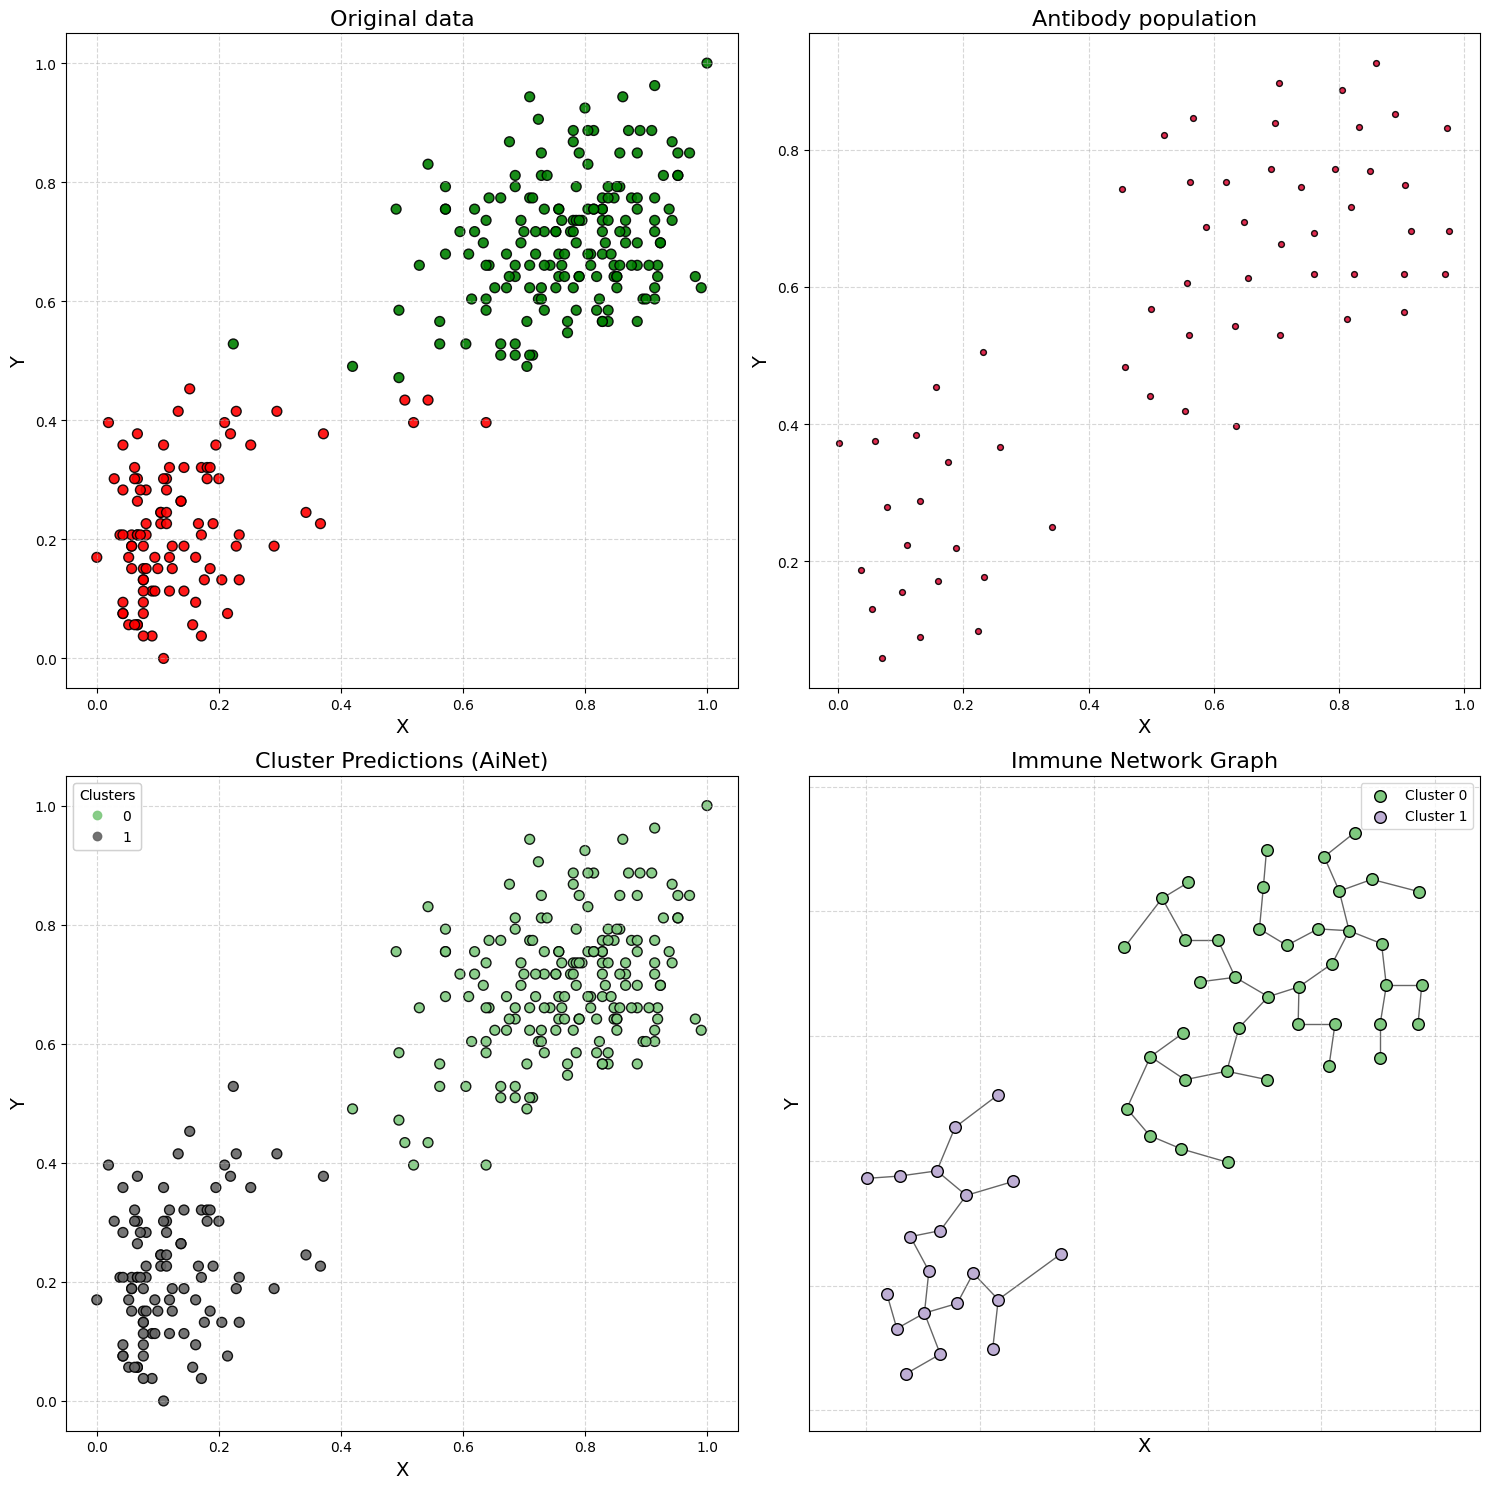

In [6]:
plot_immune_network(data, classes, predict_y, model, title_prefix="")